In [1]:
import pandas as pd
import altair as alt
import json
import geopandas as gpd

### Load data

In [5]:
df = pd.read_csv("../data/clean_number-of-deaths-by-risk-factor.csv")

In [6]:
#source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
#source:https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
shapefile = '../data/geographic_data/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Data Wrangling

In [14]:
df1 = df.query("year == 2017")
df1.drop(['country'], axis =1 ,inplace = True)

In [15]:
geo_df = gdf.merge(df1, left_on = 'country_code', right_on = 'code')

In [16]:
geo_df.drop(['code'], axis =1 ,inplace = True)

In [17]:
geo_df.iloc[:,4:] = geo_df.iloc[:,4:].div(geo_df.iloc[:,4:].sum(axis=1), axis=0) * 100

In [18]:
# convert to json file
choro_json = json.loads(geo_df.to_json())
choro_data = alt.Data(values=choro_json['features'])

### Draw map

In [19]:
# source: https://medium.com/dataexplorations/creating-choropleth-maps-in-altair-eeb7085779a1 
def draw_map(source, cols, title):
    """
    Draw heatmap for given quantitative value in world map
    
    Parameters:
    source -- (json) data source
    cols -- (string) columns in source
    title -- (string) string for death factor shown in plot title
    
    Examples:
    draw_map(choro_data, 'properties.smoking', 'smoking')
    
    """
    p_map = alt.Chart(source, 
                      title = "Death percentage of {} among countries in 2017".format(title)
                     ).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).encode(
        alt.Color(cols, type='quantitative', 
                  scale=alt.Scale(scheme='yelloworangered'),
                  title = "Percentage of death"),
         tooltip = alt.Tooltip(['properties.country:O',
                                '{}:Q'.format(cols)])
    ).properties(width=700, height=700)
    return p_map

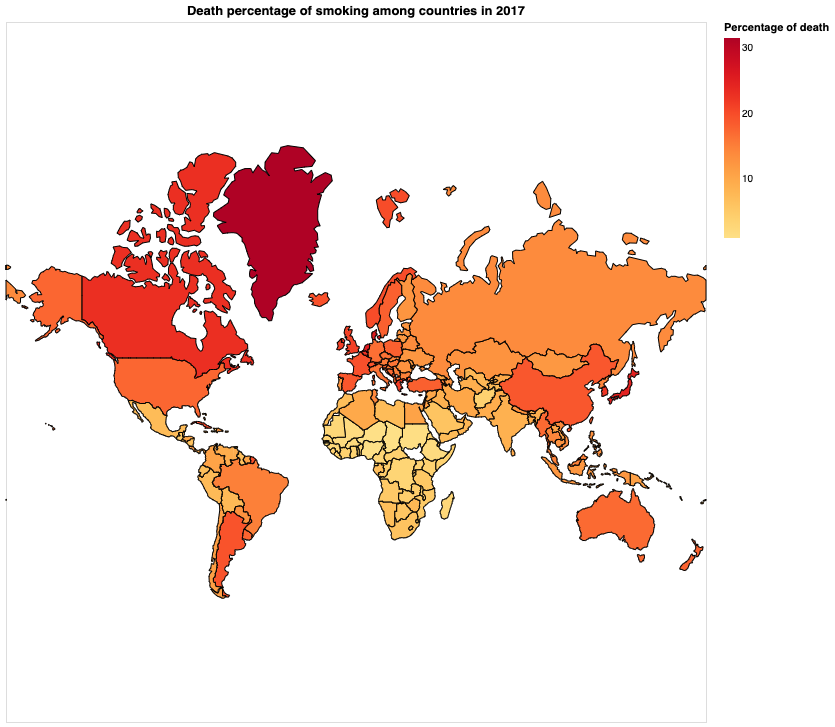

In [20]:
#example 
draw_map(choro_data, 'properties.smoking', 'smoking')